In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_data = pd.read_csv('https://raw.githubusercontent.com/mabhay3420/Deep-Into-CNN/master/Datasets/diabetes2.csv')
Y_data = X_data['Outcome']
X_data.drop(['Outcome'], 
            axis=1, inplace=True) 

# create random train/test split
indices = list(range(X_data.shape[0]))
num_training_indices = int(0.8 * X_data.shape[0])
np.random.shuffle(indices)
train_indices = indices[:num_training_indices]
test_indices = indices[num_training_indices:]

# split the data
X_data_train, X_data_test = X_data.iloc[train_indices], X_data.iloc[test_indices]
Y_data_train, Y_data_test = Y_data.iloc[train_indices], Y_data.iloc[test_indices]
print(X_data_train.shape)
print(X_data_test.shape)
print(Y_data_train.shape)
print(Y_data_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
X_data_train = X_data_train.T
print(X_data_train.shape)
Y_data_train = Y_data_train.reshape(1, X_data_train.shape[1])
print(Y_data_train.shape)

(8, 614)
(1, 614)


In [27]:
X_data_test = X_data_test.T
print(X_data_test.shape)
Y_data_test = Y_data_test.values.reshape(1, X_data_test.shape[1])
print(Y_data_test.shape)

(8, 154)
(1, 154)


In [35]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def model(X,Y, learning_rate, num_epochs):
  # initialising W and B
  n = X_data_train.shape[0]
  m = X_data_train.shape[1]
  W = np.zeros((n,1))
  B = 0 
  total_cost = []
  for i in range(num_epochs):
    Z = np.dot(W.T,X) + B    
    A = sigmoid(Z)    # hypothesis
    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))     #cost function
    # gradient calculation
    dW = (1/m)*np.dot(A-Y, X.T)
    dB = (1/m)*np.sum(A - Y)
    # update parameter values
    W -= learning_rate*dW.T
    B -= learning_rate*dB
    total_cost.append(cost)
    print("Epoch ", i, " : (Loss: ", cost, ")")
  return W,B,total_cost

In [64]:
learning_rate = 0.0001
num_epochs = 2000 #increasing num_epochs doesn't increase accuracy
W,B,cost = model(X_data_train, Y_data_train, learning_rate = learning_rate, num_epochs = num_epochs)

Epoch  0  : (Loss:  0.6931471805599454 )
Epoch  1  : (Loss:  0.6713222843473065 )
Epoch  2  : (Loss:  0.6674439282702194 )
Epoch  3  : (Loss:  0.6648254373847685 )
Epoch  4  : (Loss:  0.6628108004605022 )
Epoch  5  : (Loss:  0.66119160420956 )
Epoch  6  : (Loss:  0.6598365925760271 )
Epoch  7  : (Loss:  0.6586598308614564 )
Epoch  8  : (Loss:  0.6576052618665619 )
Epoch  9  : (Loss:  0.6566363848168617 )
Epoch  10  : (Loss:  0.6557294166295657 )
Epoch  11  : (Loss:  0.6548688183445128 )
Epoch  12  : (Loss:  0.6540443886273447 )
Epoch  13  : (Loss:  0.6532493816644256 )
Epoch  14  : (Loss:  0.6524792900614396 )
Epoch  15  : (Loss:  0.6517310579998001 )
Epoch  16  : (Loss:  0.6510025724030937 )
Epoch  17  : (Loss:  0.6502923337024171 )
Epoch  18  : (Loss:  0.6495992426688191 )
Epoch  19  : (Loss:  0.6489224623025812 )
Epoch  20  : (Loss:  0.648261328293908 )
Epoch  21  : (Loss:  0.647615290937128 )
Epoch  22  : (Loss:  0.6469838774256655 )
Epoch  23  : (Loss:  0.646366667359586 )
Epoch  

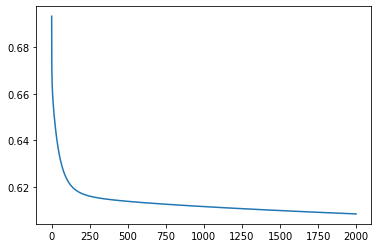

In [65]:
plt.plot(np.arange(num_epochs), cost)
plt.show()

In [66]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [67]:
accuracy(X_data_test, Y_data_test, W, B)

Accuracy of the model is :  64.94 %
